## Import Libraries & Load Dataset

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## UBER Dataset

In [2]:
data = pd.read_csv("UBER.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [3]:
data = data[["Date","Close"]]
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Close
0,2019-05-10,41.570000
1,2019-05-13,37.099998
2,2019-05-14,39.959999
3,2019-05-15,41.290001
4,2019-05-16,43.000000


<AxesSubplot:xlabel='Date', ylabel='Price'>

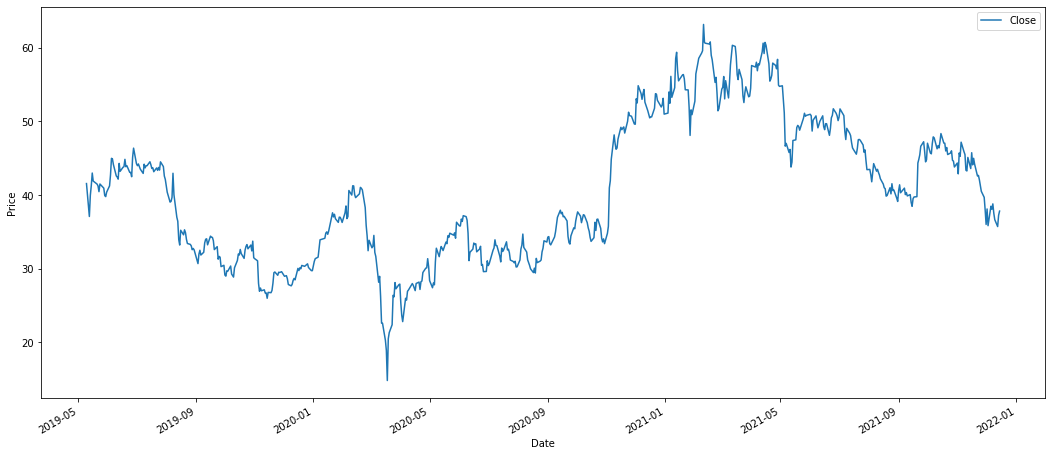

In [4]:
data.set_index("Date").plot(figsize=(18,8),xlabel="Date",ylabel="Price")

# Preprocessing

In [5]:
X = data[["Close"]]
Train , Test = X[:600],X[600:]

## Scaling
### StandardScaler

In [6]:
scale = StandardScaler()
Train = scale.fit_transform(Train)
Test = scale.transform(Test)
with open("StandardScaler","wb") as f:
    pickle.dump(scale,f)

In [7]:
def convertSignalToDataset(signal,step):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(signal[j])
        
    X,Y = np.array(X), np.array(Y)
    return torch.Tensor(X), torch.Tensor(Y)

In [8]:
X_train, Y_train = convertSignalToDataset(Train,5)
X_test , Y_test = convertSignalToDataset(Test,5)

# Model
## Recurrent Neural Network

## GRU

In [9]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,num_classes):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        h_0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
        
        x,_ = self.gru(x,h_0)
        x = x[:,-1,:]
        x = self.fc(x)
        
        return x

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN(input_size=1,hidden_size=64,num_layers=1,num_classes=1).to(device)

In [11]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_function = nn.MSELoss()

In [12]:
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    predict = model(X_train)
    loss = loss_function(predict,Y_train)
    loss.backward()
    optimizer.step()
    print(f"Epochs: {epoch+1}, Loss: {loss}")

Epochs: 1, Loss: 0.9077521562576294
Epochs: 2, Loss: 0.8828105330467224
Epochs: 3, Loss: 0.8583824038505554
Epochs: 4, Loss: 0.8343820571899414
Epochs: 5, Loss: 0.8107001185417175
Epochs: 6, Loss: 0.7872235178947449
Epochs: 7, Loss: 0.7638448476791382
Epochs: 8, Loss: 0.7404707670211792
Epochs: 9, Loss: 0.7170250415802002
Epochs: 10, Loss: 0.6934450268745422
Epochs: 11, Loss: 0.669678270816803
Epochs: 12, Loss: 0.6456780433654785
Epochs: 13, Loss: 0.621403157711029
Epochs: 14, Loss: 0.5968165993690491
Epochs: 15, Loss: 0.5718856453895569
Epochs: 16, Loss: 0.5465813875198364
Epochs: 17, Loss: 0.5208789110183716
Epochs: 18, Loss: 0.49475857615470886
Epochs: 19, Loss: 0.46820664405822754
Epochs: 20, Loss: 0.4412175416946411
Epochs: 21, Loss: 0.4137965738773346
Epochs: 22, Loss: 0.3859630525112152
Epochs: 23, Loss: 0.3577547073364258
Epochs: 24, Loss: 0.3292334973812103
Epochs: 25, Loss: 0.30049192905426025
Epochs: 26, Loss: 0.27166101336479187
Epochs: 27, Loss: 0.24291828274726868
Epochs:

Epochs: 220, Loss: 0.02797861211001873
Epochs: 221, Loss: 0.02787364274263382
Epochs: 222, Loss: 0.027768947184085846
Epochs: 223, Loss: 0.02766457572579384
Epochs: 224, Loss: 0.027560556307435036
Epochs: 225, Loss: 0.02745693176984787
Epochs: 226, Loss: 0.027353739365935326
Epochs: 227, Loss: 0.027251023799180984
Epochs: 228, Loss: 0.02714882232248783
Epochs: 229, Loss: 0.027047187089920044
Epochs: 230, Loss: 0.026946142315864563
Epochs: 231, Loss: 0.026845745742321014
Epochs: 232, Loss: 0.026746029034256935
Epochs: 233, Loss: 0.026647035032510757
Epochs: 234, Loss: 0.026548804715275764
Epochs: 235, Loss: 0.026451386511325836
Epochs: 236, Loss: 0.026354806497693062
Epochs: 237, Loss: 0.02625911310315132
Epochs: 238, Loss: 0.02616434544324875
Epochs: 239, Loss: 0.02607053518295288
Epochs: 240, Loss: 0.0259777270257473
Epochs: 241, Loss: 0.02588595263659954
Epochs: 242, Loss: 0.02579524926841259
Epochs: 243, Loss: 0.02570565603673458
Epochs: 244, Loss: 0.0256172027438879
Epochs: 245, Lo

Epochs: 430, Loss: 0.02033526636660099
Epochs: 431, Loss: 0.020320110023021698
Epochs: 432, Loss: 0.020304977893829346
Epochs: 433, Loss: 0.020289868116378784
Epochs: 434, Loss: 0.02027479000389576
Epochs: 435, Loss: 0.020259732380509377
Epochs: 436, Loss: 0.020244700834155083
Epochs: 437, Loss: 0.020229695364832878
Epochs: 438, Loss: 0.020214714109897614
Epochs: 439, Loss: 0.020199758931994438
Epochs: 440, Loss: 0.020184824243187904
Epochs: 441, Loss: 0.020169919356703758
Epochs: 442, Loss: 0.020155038684606552
Epochs: 443, Loss: 0.020140184089541435
Epochs: 444, Loss: 0.020125355571508408
Epochs: 445, Loss: 0.02011054940521717
Epochs: 446, Loss: 0.02009577304124832
Epochs: 447, Loss: 0.020081020891666412
Epochs: 448, Loss: 0.020066289231181145
Epochs: 449, Loss: 0.020051587373018265
Epochs: 450, Loss: 0.020036909729242325
Epochs: 451, Loss: 0.020022260025143623
Epochs: 452, Loss: 0.02000763639807701
Epochs: 453, Loss: 0.019993038848042488
Epochs: 454, Loss: 0.019978463649749756
Epoch

Epochs: 642, Loss: 0.017816171050071716
Epochs: 643, Loss: 0.017808139324188232
Epochs: 644, Loss: 0.017800142988562584
Epochs: 645, Loss: 0.017792189493775368
Epochs: 646, Loss: 0.017784275114536285
Epochs: 647, Loss: 0.017776399850845337
Epochs: 648, Loss: 0.017768561840057373
Epochs: 649, Loss: 0.017760764807462692
Epochs: 650, Loss: 0.017753001302480698
Epochs: 651, Loss: 0.017745282500982285
Epochs: 652, Loss: 0.017737602815032005
Epochs: 653, Loss: 0.01772995851933956
Epochs: 654, Loss: 0.01772235333919525
Epochs: 655, Loss: 0.017714787274599075
Epochs: 656, Loss: 0.01770726405084133
Epochs: 657, Loss: 0.017699776217341423
Epochs: 658, Loss: 0.017692329362034798
Epochs: 659, Loss: 0.017684919759631157
Epochs: 660, Loss: 0.0176775474101305
Epochs: 661, Loss: 0.017670216038823128
Epochs: 662, Loss: 0.017662925645709038
Epochs: 663, Loss: 0.017655668780207634
Epochs: 664, Loss: 0.017648454755544662
Epochs: 665, Loss: 0.017641276121139526
Epochs: 666, Loss: 0.017634140327572823
Epoch

Epochs: 857, Loss: 0.016894616186618805
Epochs: 858, Loss: 0.016893329098820686
Epochs: 859, Loss: 0.01689194329082966
Epochs: 860, Loss: 0.01689046621322632
Epochs: 861, Loss: 0.01688900589942932
Epochs: 862, Loss: 0.016887636855244637
Epochs: 863, Loss: 0.01688636653125286
Epochs: 864, Loss: 0.016885127872228622
Epochs: 865, Loss: 0.01688384637236595
Epochs: 866, Loss: 0.016882523894309998
Epochs: 867, Loss: 0.016881195828318596
Epochs: 868, Loss: 0.016879906877875328
Epochs: 869, Loss: 0.016878681257367134
Epochs: 870, Loss: 0.016877491027116776
Epochs: 871, Loss: 0.016876306384801865
Epochs: 872, Loss: 0.01687510311603546
Epochs: 873, Loss: 0.01687389425933361
Epochs: 874, Loss: 0.016872694715857506
Epochs: 875, Loss: 0.01687152124941349
Epochs: 876, Loss: 0.01687038317322731
Epochs: 877, Loss: 0.01686926558613777
Epochs: 878, Loss: 0.016868161037564278
Epochs: 879, Loss: 0.016867056488990784
Epochs: 880, Loss: 0.01686595194041729
Epochs: 881, Loss: 0.016864852979779243
Epochs: 882

# Predict

In [13]:
model.eval()
pred_train = model(X_train)
pred_train = pred_train.data.numpy()
pred_test = model(X_test)
pred_test = pred_test.data.numpy()
pred_train = scale.inverse_transform(pred_train)
pred_test = scale.inverse_transform(pred_test)
nan_data = np.ones((600,1)) * np.nan
pred_test = np.concatenate((nan_data,pred_test),axis=0)

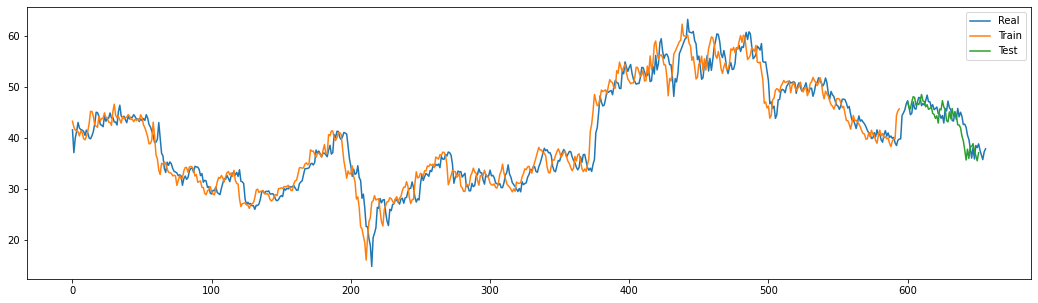

In [14]:
plt.figure(figsize=(18,5))
plt.plot(X,label="Real")
plt.plot(pred_train,label="Train")
plt.plot(pred_test,label="Test")
plt.legend()
plt.show()